# Metodos Numericos
# Brusselator


#### Por: Andrea Posada, Santiago Hincapie y Juan Jose Muñoz

In [1]:
# Algunas librerias importantes
import numpy as np
import matplotlib.pyplot as plt
# Comando para poder desplegar las graficas en la linea
%matplotlib inline

In [2]:
def rk4(f,g,x0,y0,t):
    '''
    Implementacion del metodo Runge-Kutta de 4to orden 
    para la solucion sistemas de ecuaciones de la forma
    x' = f(x,y,t)
    y' = g(x,y,t)
    con x(0)=x0 y y(0)=y0
    USO :
        x,y = rk4(f,g,x0,y0,t)
    INPUT :
        f  : funcion de x,y y t igual a dx/dt. 
        g  : funcion de x,y y t igual a dy/dt.
        x0 : Condicion inicial. Especifica el 
             valor de x cuando t=t[0]. 
        y0 : Condicion inicial. Especifica el
             valor de x cuando t=t[0].
        t  : Numpy Array o lista que contiene
             los valores de t, para los cuales
             se solucionara la ecuacion diferencial.
    OUTPUT :
        x : Numpy array con las soluciones de la 
            ecuacion diferencial para x, evuluada
            en los valores respectivos en t.
        y : Numpy array con las soluciones de la 
            ecuacion diferencial para y, evuluada
            en los valores respectivos en t.
    Reference :
    * Help with using the Runge-Kutta 4th order 
      method on a system of 2 first order,
      (http://math.stackexchange.com/q/721234)
    * Notas de Clase
    '''
    n = len(t)
    # se crean los Numpy arrey tan grandes como los tiempos.
    x = np.array([x0]*n)
    y = np.array([y0]*n)
    # se realiza el metodo iterativo, como se describe en el URL
    for i in xrange(n-1):
        h = t[i+1] - t[i]
        k0 = h*f(x[i],y[i],t[i])
        l0 = h*g(x[i],y[i],t[i])
        k1 = h*f(x[i]+k0*0.5,y[i]+l0*0.5,t[i]+h*0.5)
        l1 = h*g(x[i]+k0*0.5,y[i]+l0*0.5,t[i]+h*0.5)
        k2 = h*f(x[i]+k1*0.5,y[i]+l1*0.5,t[i]+h*0.5)
        l2 = h*g(x[i]+k1*0.5,y[i]+l1*0.5,t[i]+h*0.5)
        k3 = h*f(x[i]+k2*0.5,y[i]+l2*0.5,t[i]+h*0.5)
        l3 = h*g(x[i]+k2,y[i]+l2,t[i+1])
        x[i+1] = x[i] + (k0 + 2.0*(k1+k2)+k3)/6.0
        y[i+1] = y[i] + (l0 + 2.0*(l1+l2)+l3)/6.0
    return x,y

In [3]:

def euler( f,g, x0,y0, t ):
    '''
    Implementacion del metodo de euler para la
    solucion sistemas de ecuaciones de la forma
    x' = f(x,y,t)
    y' = g(x,y,t)
    con x(0)=x0 y y(0)=y0
    USO :
        x,y = euler(f,g,x0,y0,t)
    INPUT :
        f  : funcion de x,y y t igual a dx/dt. 
        g  : funcion de x,y y t igual a dy/dt.
        x0 : Condicion inicial. Especifica el 
             valor de x cuando t=t[0]. 
        y0 : Condicion inicial. Especifica el
             valor de x cuando t=t[0].
        t  : Numpy Array o lista que contiene
             los valores de t, para los cuales
             se solucionara la ecuacion diferencial.
    OUTPUT :
        x : Numpy array con las soluciones de la 
            ecuacion diferencial para x, evuluada
            en los valores respectivos en t.
        y : Numpy array con las soluciones de la 
            ecuacion diferencial para y, evuluada
            en los valores respectivos en t.
    Reference :
    * Euler's Method: Answer to Example 1,
      (http://www.sosmath.com/diffeq/system/euler/example1/answer.html)
    * Notas de Clase
    '''
    n = len( t )
    # se crean los Numpy arrey tan grandes como los tiempos.
    x = np.array( [x0] * n )
    y = np.array( [y0] * n)
    # se realiza el metodo iterativo, de manera similar al ejemplo.
    for i in xrange( n - 1 ):
        h = t[i+1] - t[i]
        x[i+1] = x[i] + h * f( x[i],y[i], t[i])
        y[i+1] = y[i] + h * g( x[i],y[i], t[i])

    return x,y

In [4]:
A  = 1 #se define el parametro A.
B  = 3 #se define el parametro B.

xm = []
ym = []

data = open('bru.dat','r')

for i in data:
    aux = i.split('\t')
    xm.append(aux[0])
    ym.append(aux[1])

def fs(x):
   return x[:-1]

xm = np.array(xm)
ym = np.array(map(fs,ym))
    
def f(x,y,t):
    # A+X²Y-(B+1)X
    return A-(B+1.0)*x+np.square(x)*y
    
def g(x,y,t):
    # BX -X²Y
    return B*x - y*np.square(x)
    
a, b = (0.0,10.0)#los limites de t.
n = 150 #el numero de intervalos.
t = np.linspace( a, b, n )


x0 = 1.0 #condicion inicial para x.
y0 = 0.0 #condicion inicial para y.

#Se ejecutan los metodos numericos.
x_e,y_e = euler(f,g,x0,y0,t)
x_k,y_k = rk4(f,g,x0,y0,t) 

## Graficas

A continuacion compararemos las graficas que representan el modelo del Brusselator

$$ \dfrac{d}{dt}X = A+X^2Y-(B+1)X $$
$$ \dfrac{d}{dt}Y = BX -X²Y$$

Con $A = 1$ y $B = 3$.

De color verde se encuentran las soluciones propuestas por el metodo de euler.

De color rojo se encuentran las soluciones propuestas por el metodo de runge-kutta de 4$^{to}$ orden.

De color azul se encuentran la grafica resultado del diagrama de bloques, realizado en simulink.

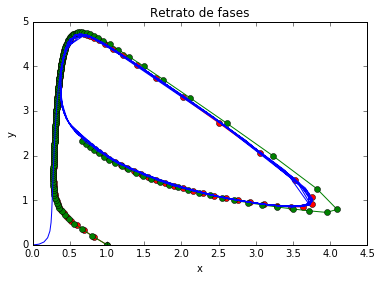

In [5]:
plt.plot(x_k,y_k,'r-o', label = 'runge-kutta')
plt.plot(x_e,y_e,'g-o',label = 'euler')
plt.plot(xm,ym, label = 'matlab')
plt.title('Retrato de fases')
plt.xlabel('x')
plt.ylabel('y')

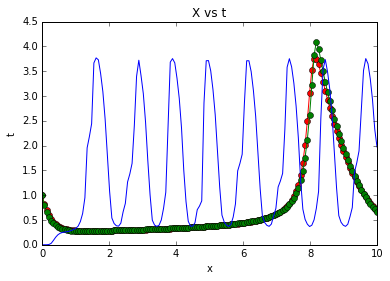

In [6]:
plt.plot(t,x_k,'r-o', label = 'runge-kutta')
plt.plot(t,x_e,'g-o',label = 'euler')
plt.plot(t,xm, label = 'matlab')
plt.title('X vs t')
plt.xlabel('x')
plt.ylabel('t')

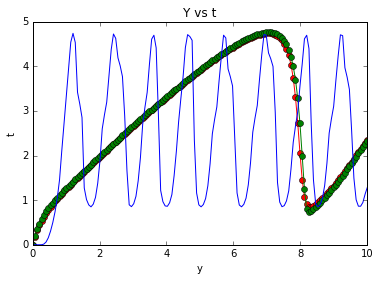

In [7]:
plt.plot(t,y_k,'r-o', label = 'runge-kutta')
plt.plot(t,y_e,'g-o',label = 'euler')
plt.plot(t,ym, label = 'matlab')
plt.title('Y vs t')
plt.xlabel('y')
plt.ylabel('t')